# 😎 Chapter 4. Part 2: Generalized Linear Models - Linear and Poisson Regression

We will now begin the next section of our preparation, which focuses on Chapter 4. In this initial part of the chapter, we will explore `Linear and Poisson Regression`. So, let's go!

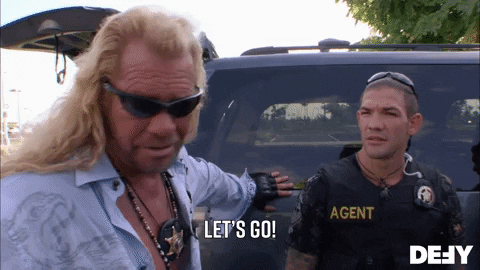

#### Chapter 4.6 [Read full chapter in ISLP]
#### 📚 Theory Summary

`Generalized Linear Models` (GLMs) constitute a versatile class of statistical models capable of accommodating various types of response variables, including continuous, binary, and count data. Unlike traditional linear regression models, GLMs relax the assumption of normally distributed errors and allow for a broader range of response distributions, such as `Gaussian`, `Binomial`, and `Poisson` distributions. GLMs achieve this flexibility by introducing a link function that relates the expected value of the response variable to a linear combination of predictor variables. This enables GLMs to handle non-linear relationships between predictors and response variables, making them suitable for a wide array of applications across different fields, including healthcare, finance, and environmental science. Additionally, GLMs provide interpretable parameter estimates and offer robust statistical inference methods, making them a valuable tool for analyzing complex data structures and addressing various research questions.

We will utilize the `Poisson` distribution in this context. Here are a few mathematical concepts to recall for this section:

$$
P(Y = k) = \frac{e^{-\lambda} \lambda^k}{k!} \quad \text{for} \quad k = 0, 1, 2, \ldots
$$

The mean $\lambda = E(Y)$ in this case is

$$
\lambda(X_1,\ldots , X_p) = e^{{\beta}_0 +  \sum_{i=1}^{p} {\beta}_i X_i}
$$

And the Likelihood function is given by

$$
𝓁(\beta_0, \beta_1, \ldots , \beta_p) = \prod_{i=1}^{n} \frac{e^{-\lambda(x_i)}\lambda(x_i)^{y_i}}{y_i !}
$$

## 🚲 Linear and Poisson Regression on the Bikeshare Data

In [1]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from ISLP import load_data
from ISLP.models import (ModelSpec as MS ,summarize)

from ISLP import confusion_table
from ISLP.models import contrast
from sklearn.discriminant_analysis import \
    (LinearDiscriminantAnalysis as LDA ,
     QuadraticDiscriminantAnalysis as QDA)
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings("ignore")

In [2]:
Bike = load_data('Bikeshare')
pd.DataFrame(Bike.columns, columns=['Features'])

,Features
0,season
1,mnth
2,day
3,hr
4,holiday
5,weekday
6,workingday
7,weathersit
8,temp
9,atemp


Let's start by fitting a linear regression model to our data.

In [3]:
X = MS(['mnth', 'hr', 'workingday', 'temp', 'weathersit']).fit_transform(Bike)
y = Bike['bikers']
M_lm = sm.OLS(y, X).fit()
print(summarize(M_lm))

                                 coef  std err       t  P>|t|
intercept                    -68.6317    5.307 -12.932  0.000
mnth[Feb]                      6.8452    4.287   1.597  0.110
mnth[March]                   16.5514    4.301   3.848  0.000
mnth[April]                   41.4249    4.972   8.331  0.000
mnth[May]                     72.5571    5.641  12.862  0.000
mnth[June]                    67.8187    6.544  10.364  0.000
mnth[July]                    45.3245    7.081   6.401  0.000
mnth[Aug]                     53.2430    6.640   8.019  0.000
mnth[Sept]                    66.6783    5.925  11.254  0.000
mnth[Oct]                     75.8343    4.950  15.319  0.000
mnth[Nov]                     60.3100    4.610  13.083  0.000
mnth[Dec]                     46.4577    4.271  10.878  0.000
hr[1]                        -14.5793    5.699  -2.558  0.011
hr[2]                        -21.5791    5.733  -3.764  0.000
hr[3]                        -31.1408    5.778  -5.389  0.000
hr[4]   

The encoding of categorical variables into numerical vectors allows the linear regression model to handle them appropriately by representing each category as a separate feature. This transformation ensures that the model can interpret and utilize the categorical variables effectively in the regression analysis. Rerunning the regression after encoding ensures that the model incorporates the encoded features properly, enabling accurate estimation of coefficients and interpretation of results. So, let's do that.

In [4]:
hr_encode = contrast('hr', 'sum')
mnth_encode = contrast('mnth', 'sum')

X2 = MS([mnth_encode, hr_encode, 'workingday', 'temp', 'weathersit']).fit_transform(Bike)
M_lm2 = sm.OLS(y, X2).fit()
S2 = summarize(M_lm2)
print(S2)

                                 coef  std err       t  P>|t|
intercept                     73.5974    5.132  14.340  0.000
mnth[Jan]                    -46.0871    4.085 -11.281  0.000
mnth[Feb]                    -39.2419    3.539 -11.088  0.000
mnth[March]                  -29.5357    3.155  -9.361  0.000
mnth[April]                   -4.6622    2.741  -1.701  0.089
mnth[May]                     26.4700    2.851   9.285  0.000
mnth[June]                    21.7317    3.465   6.272  0.000
mnth[July]                    -0.7626    3.908  -0.195  0.845
mnth[Aug]                      7.1560    3.535   2.024  0.043
mnth[Sept]                    20.5912    3.046   6.761  0.000
mnth[Oct]                     29.7472    2.700  11.019  0.000
mnth[Nov]                     14.2229    2.860   4.972  0.000
hr[0]                        -96.1420    3.955 -24.307  0.000
hr[1]                       -110.7213    3.966 -27.916  0.000
hr[2]                       -117.7212    4.016 -29.310  0.000
hr[3]   

Now, let's isolate the coefficients for each month.

In [5]:
coef_month = S2[S2.index.str.contains('mnth')]['coef']
coef_month

mnth[Jan]     -46.0871
mnth[Feb]     -39.2419
mnth[March]   -29.5357
mnth[April]    -4.6622
mnth[May]      26.4700
mnth[June]     21.7317
mnth[July]     -0.7626
mnth[Aug]       7.1560
mnth[Sept]     20.5912
mnth[Oct]      29.7472
mnth[Nov]      14.2229
Name: coef, dtype: float64

Next, we append December as the negative sum of all other months.

In [6]:
months = Bike['mnth'].dtypes.categories
coef_month = pd.concat([coef_month,
            pd.Series([-coef_month.sum()],
            index=['(Intercept)'])])
coef_month

mnth[Jan]     -46.0871
mnth[Feb]     -39.2419
mnth[March]   -29.5357
mnth[April]    -4.6622
mnth[May]      26.4700
mnth[June]     21.7317
mnth[July]     -0.7626
mnth[Aug]       7.1560
mnth[Sept]     20.5912
mnth[Oct]      29.7472
mnth[Nov]      14.2229
(Intercept)     0.3705
dtype: float64

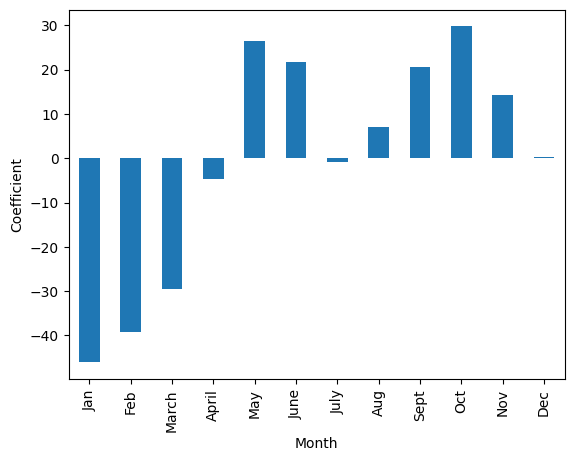

In [7]:
# Plot the coefficients of each month in a linear regression model
fig_month, ax_month = subplots()
coef_month.plot(kind='bar', ax=ax_month)
ax_month.set_xticklabels(months)
ax_month.set_ylabel('Coefficient')
ax_month.set_xlabel('Month')
plt.show()

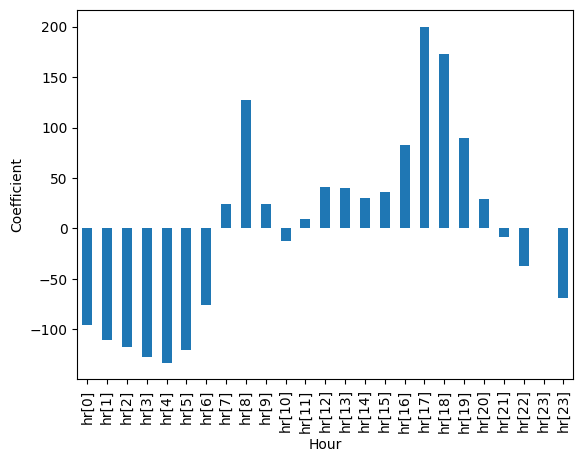

In [8]:
# Extract coefficients for each hour
coef_hr = S2[S2.index.str.contains('hr')]['coef']
# Reindex the coefficients to include all hours
coef_hr = coef_hr.reindex(['hr[{0}]'.format(h) for h in range(24)])
# Append the coefficient for hr[23] by subtracting the sum of coefficients from the negative sum
coef_hr = pd.concat([coef_hr, pd.Series([-coef_hr.sum()], index=['hr[23]'])])

# Plot the coefficients of each hour in a linear regression model
fig_hr, ax_hr = subplots()
coef_hr.plot(kind='bar', ax=ax_hr)
ax_hr.set_ylabel('Coefficient')
ax_hr.set_xlabel('Hour')
plt.show()

Now, we fit a Poisson regression model to the Bikeshare data. The main change is that we utilize the `sm.GLM()` function with the Poisson family specified instead.

In [9]:
model_poisson = sm.GLM(y, X2, family=sm.families.Poisson()).fit()
s_poisson = summarize(model_poisson)
coef_month_poisson = s_poisson[s_poisson.index.str.contains('mnth')]['coef']
coef_month_poisson = pd.concat([coef_month_poisson,
                                pd.Series([-coef_month_poisson.sum()],
                                          index=['(Intercept)'])])
coef_hr_poisson = s_poisson[s_poisson.index.str.contains('hr')]['coef']
coef_hr_poisson = coef_hr_poisson.reindex(['hr[{0}]'.format(h) for h in range(24)])


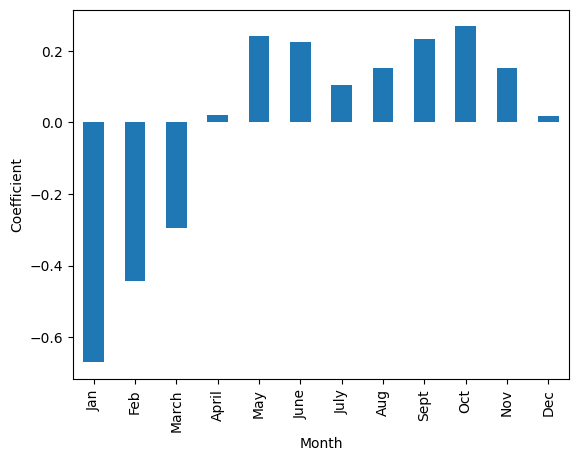

In [10]:
# plot the coefficients of each month in a Poisson regression model
fig_month_poisson, ax_month_poisson = subplots()
coef_month_poisson.plot(kind='bar', ax=ax_month_poisson)
ax_month_poisson.set_xticklabels(months)
ax_month_poisson.set_ylabel('Coefficient')
ax_month_poisson.set_xlabel('Month')
plt.show()

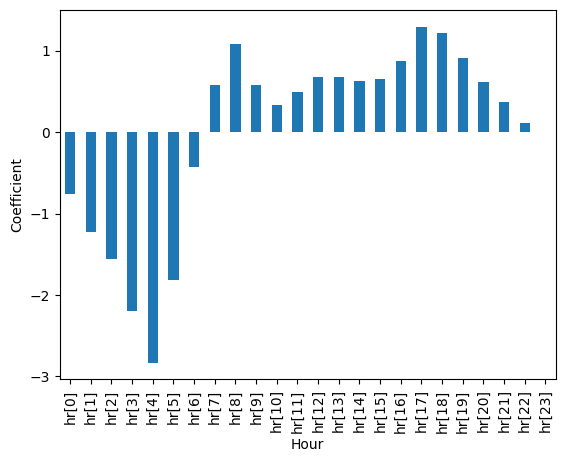

In [11]:
# plot the coefficients of each hour in a Poisson regression model
fig_hr_poisson, ax_hr_poisson = subplots()
coef_hr_poisson.plot(kind='bar', ax=ax_hr_poisson)
ax_hr_poisson.set_ylabel('Coefficient')
ax_hr_poisson.set_xlabel('Hour')
plt.show()

# On to the next one ➜

We have completed the section on `Classification`. Next, we will proceed with `Resampling Methods`.

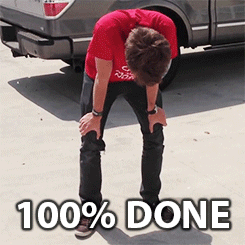